In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Alphabets_data[1].csv")

In [ ]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
df.shape

(20000, 17)

In [ ]:
df.columns.tolist()

['letter',
 'xbox',
 'ybox',
 'width',
 'height',
 'onpix',
 'xbar',
 'ybar',
 'x2bar',
 'y2bar',
 'xybar',
 'x2ybar',
 'xy2bar',
 'xedge',
 'xedgey',
 'yedge',
 'yedgex']

In [ ]:
df.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [ ]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [ ]:
df['letter'].value_counts()

,count
letter,
U,813
D,805
P,803
T,796
M,792
A,789
X,787
Y,786
N,783


In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

# Apply it to the target column
df['letter_encoded'] = le.fit_transform(df['letter'])


df[['letter', 'letter_encoded']].head()


,letter,letter_encoded
0,T,19
1,I,8
2,D,3
3,N,13
4,G,6


In [ ]:
df=df.drop('letter', axis=1)
x=df.drop('letter_encoded', axis=1)
y=df['letter_encoded']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
input_dim=x_train_scaled.shape[1]
output_classes=len(np.unique(y_train))

model=Sequential()
model.add(Dense(64, input_dim=input_dim,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(output_classes,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#train the model
history=model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),epochs=50, batch_size=32)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3361 - loss: 2.4239 - val_accuracy: 0.7007 - val_loss: 1.0255
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7257 - loss: 0.9638 - val_accuracy: 0.7810 - val_loss: 0.7740
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7920 - loss: 0.7249 - val_accuracy: 0.8198 - val_loss: 0.6345
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8224 - loss: 0.6123 - val_accuracy: 0.8375 - val_loss: 0.5624
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8522 - loss: 0.5238 - val_accuracy: 0.8540 - val_loss: 0.4962
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8617 - loss: 0.4770 - val_accuracy: 0.8720 - val_loss: 0.4404
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8773 - loss: 0.4170 - val_accuracy: 0.8813 - val_loss: 0.3979
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8899 - loss: 0.3692 - val_accuracy: 0.

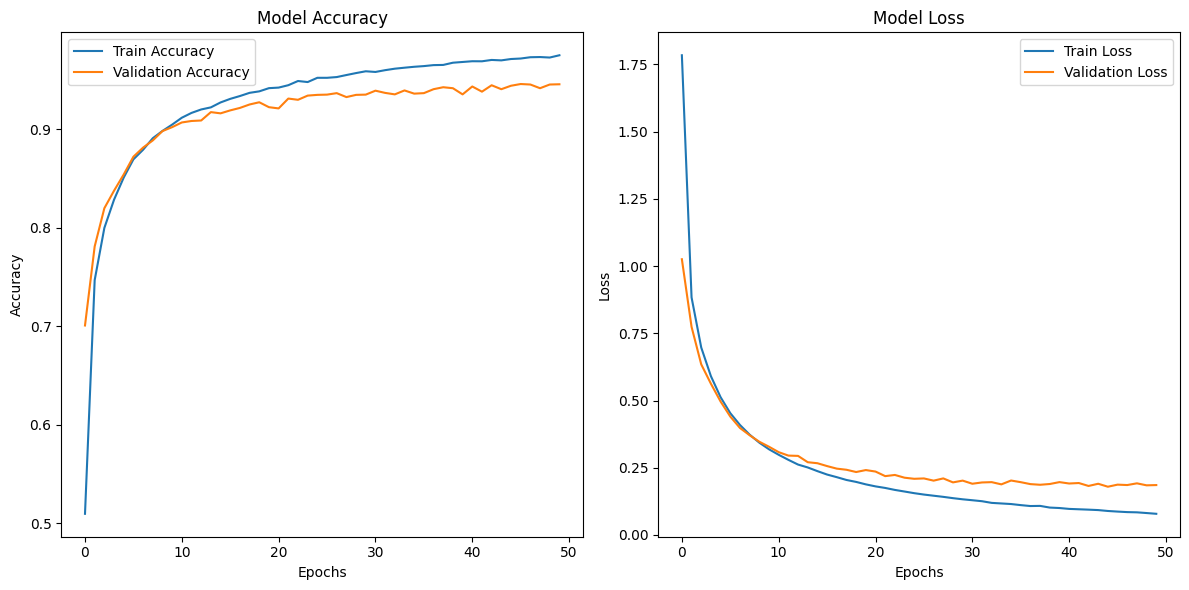

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model.predict(x_test_scaled)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Classification report
print(classification_report(y_test, y_pred))


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       158
           1       0.86      0.93      0.89       153
           2       0.97      0.96      0.97       147
           3       0.94      0.93      0.93       161
           4       0.92      0.93      0.93       154
           5       0.95      0.93      0.94       155
           6       0.91      0.94      0.93       155
           7       0.92      0.89      0.90       147
           8       0.97      0.91      0.94       151
           9       0.95      0.96      0.96       149
          10       0.88      0.95      0.91       148
          11       0.98      0.95      0.96       152
          12       0.98      0.92      0.95       158
          13       0.95      0.92      0.94       157
          14       0.93      0.95      0.94       150
          15       0.96      0.96      0.96       161
          16       0.96      0.95      0

In [ ]:
model.save('alphabet_ann_model.h5')

In [ ]:
# Data Preprocessing
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/Alphabets_data[1].csv")

# Encoding labels
le = LabelEncoder()
df['letter_encoded'] = le.fit_transform(df['letter'])

# Features and Target
x = df.drop(columns=['letter', 'letter_encoded'])
y = df['letter_encoded']

# Scaling features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split data into train and test sets
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Building the ANN model
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

model = Sequential()

# Input Layer and Hidden Layers
model.add(Dense(128, input_dim=x_train_scaled.shape[1], activation='relu'))
model.add(BatchNormalization())  # Batch normalization to stabilize training
model.add(Dropout(0.5))  # Dropout to prevent overfitting

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output Layer
output_classes = len(le.classes_)  # Based on unique labels
model.add(Dense(output_classes, activation='softmax'))

# Compile the model with a new learning rate
optimizer = Adam(learning_rate=0.0001)  # Decrease learning rate for better convergence
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with modified epochs and batch size
history = model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=100, batch_size=64)

# Evaluate the model
#from sklearn.metrics import classification_report

#y_pred = model.predict(x_test_scaled)
#y_pred = y_pred.argmax(axis=1)


#print(classification_report(y_test, y_pred))



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 50s 6ms/step - accuracy: 0.0468 - loss: 4.2442 - val_accuracy: 0.1890 - val_loss: 2.9630
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1048 - loss: 3.5640 - val_accuracy: 0.3277 - val_loss: 2.4644
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1565 - loss: 3.1400 - val_accuracy: 0.4220 - val_loss: 2.1435
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2144 - loss: 2.8057 - val_accuracy: 0.4787 - val_loss: 1.9376
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2568 - loss: 2.5814 - val_accuracy: 0.5203 - val_loss: 1.7892
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3007 - loss: 2.4030 - val_accuracy: 0.5552 - val_loss: 1.6695
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3384 - loss: 2.2478 - val_accuracy: 0.5922 - val_loss: 1.5720
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3780 - loss: 2.1126 - val_accuracy: 0.613

ValueError: Mix of label input types (string and number)

In [ ]:
# Evaluate the model
from sklearn.metrics import classification_report

y_pred = model.predict(x_test_scaled)
y_pred = y_pred.argmax(axis=1)


print(classification_report(y_test, y_pred))

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       149
           1       0.70      0.93      0.80       153
           2       0.97      0.84      0.90       137
           3       0.85      0.89      0.87       156
           4       0.86      0.91      0.89       141
           5       0.84      0.85      0.84       140
           6       0.82      0.85      0.84       160
           7       0.85      0.63      0.73       144
           8       0.95      0.83      0.88       146
           9       0.91      0.85      0.88       149
          10       0.78      0.78      0.78       130
          11       0.94      0.88      0.91       155
          12       0.92      0.95      0.94       168
          13       0.96      0.89      0.92       151
          14       0.85      0.88      0.87       145
          15       0.96      0.87      0.91       173
          16       0.95      0.87      0

**Artificial Neural Network (ANN) Classification Report**

---

### Dataset: `Alphabets_data.csv`
- **Features:** 16 numerical attributes
- **Target:** Alphabet labels (A-Z) encoded as integers (0-25)

---

### Objective:
To build and evaluate an Artificial Neural Network (ANN) model for multiclass classification of alphabet characters using the given dataset.

---

## Steps Performed:

### 1. Data Preprocessing
- Checked for missing values (none found)
- Verified data types
- Encoded target labels using `LabelEncoder`
- Scaled the feature values using `StandardScaler`
- Split the dataset: `80%` training, `20%` testing

---

## Model Implementation & Evaluation

### 1. **Model 1: Default ANN**
- **Layers:**
  - Input Layer: 16 features  
  - Hidden Layer 1: 64 neurons, ReLU activation  
  - Hidden Layer 2: 32 neurons, ReLU activation  
  - Output Layer: 26 neurons (softmax)
- **Loss Function:** Sparse Categorical Crossentropy  
- **Optimizer:** Adam  
- **Metrics:** Accuracy  
- **Epochs:** **50**

**Performance on Test Data:**
- **Accuracy:** `95%`
- **Macro Avg F1-Score:** `0.95`
- The model performs well across all classes with high precision, recall, and F1-scores.

---

### 2. **Model 2: Tuned ANN**
- **Layers:**
  - Input Layer: 16 features  
  - Hidden Layer 1: 128 neurons, ReLU activation  
  - Hidden Layer 2: 64 neurons, ReLU activation  
  - Hidden Layer 3: 32 neurons, ReLU activation  
  - Output Layer: 26 neurons (softmax)
- **Loss Function:** Sparse Categorical Crossentropy  
- **Optimizer:** Adam  
- **Metrics:** Accuracy  
- **Epochs:** 100

**Performance on Test Data:**
- **Accuracy:** `87%`
- **Macro Avg F1-Score:** `0.87`
- Model performance dropped due to reduced training epochs and possibly increased model complexity.

---

## Conclusion:
- The **default ANN model with 2 hidden layers** and **50 training epochs** outperformed the tuned model.
- **Recommendation:** Stick to simpler architectures and ensure sufficient training epochs for optimal performance on this dataset.

---

### Tools Used:
- Python
- Libraries: Pandas, Numpy, Scikit-learn, TensorFlow/Keras, Matplotlib

---



